In [1]:
import os
import json

import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

dataDir = "Data"

gpColors = {
    "G1": "#EB261F",
    "G2": "#1CA4FC",
    "G2.1": "#00FFFF"
}

webImagesDir = os.path.join("docs", "images")

In [2]:
info = pd.read_csv(os.path.join(dataDir, "info.csv"))
info["Collection date"] = pd.to_datetime(info["Collection date"])

with open(os.path.join(dataDir, "genotypes.json")) as f:
    genotypes = json.load(f)

In [3]:
info["Genotype"] = pd.Series()

for gp, accessions in genotypes.items():
    info.loc[info["Accession ID"].isin(accessions), "Genotype"] = gp

info = info[~info["Genotype"].isna()].reset_index(drop=True)

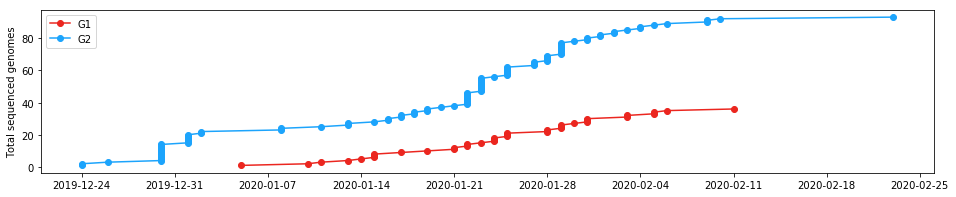

In [4]:
plt.figure(figsize=(16,3))

for gp in genotypes.keys():
    gpInfo = info.loc[info["Genotype"] == gp, ("Accession ID", "Collection date")]
    gpInfo[gp] = 1
    gpInfo.sort_values("Collection date", inplace=True)
    gpInfo.set_index("Collection date", inplace=True)
    gpInfo = gpInfo[gp].cumsum()
    plt.plot_date(gpInfo.index, gpInfo, linestyle="solid", color=gpColors[gp])

plt.ylabel("Total sequenced genomes")
plt.legend()
plt.savefig(fname = os.path.join(webImagesDir, "collection_time.svg"), bbox_inches="tight")
plt.show()